In [1]:
import pandas as pd
import os

C:\Users\makar\.conda\envs\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\makar\.conda\envs\python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\makar\.conda\envs\python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [52]:
os.getcwd()
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


In [16]:
df_all = pd.read_csv("datalatin1.csv", encoding='latin-1')

In [12]:
####Categorize

In [28]:
df_all.columns

Index(['Donory_n_633', 'POL', 'Vozrast', 'Vid_donacii', 'krov', 'plazma',
       'trombocity', 'obsledovania', 'Tip_donacii', 'HGB', 'RET_HE',
       'DELTA_HE', 'HYPER_HE', 'HYPO_HE', 'Mikrocity', 'Makrocity', 'RBC',
       'perc_RETIC', 'num_RETIC', 'HCT', 'RDW_SD', 'MCV', 'MCH', 'MCHC',
       'RDW_CV', 'WBC', 'PLT', 'Faktor_mikrocitarnoj_anemii',
       'Hb_nizkoj_plotnosti', 'Syvorotocnoe_zhelezo', 'OZHSS', 'CRP2',
       'Ferritin', 'Transferrin', 'Nasysenie_transferrina_zelezomti',
       'RET_HE...36', 'Mikrocity...37', 'RBC...38', 'HCT...39', 'RDW_SD...40',
       'MCV...41', 'MCH...42', 'RDW_CV...43',
       'Faktor_mikrocitarnoj_anemii...44', 'HB_nizkoj_plotnosti...45',
       'Syvorotocnoe_zhelezo...46', 'OZHSS...47', 'Ferritin...48',
       'Transferrin...49', 'Nasysenie_transferrina_zhelezomti...50',
       'Neobhodimost_doobsledovania', 'Neobhodimost_reabilitacii',
       'donatcia_krovi_i_komponentov_do_obsledovannya', 'Diagnosis'],
      dtype='object')

In [18]:
conditions = (
    (df_all['Ferritin'] < 30) |
    (df_all['Syvorotocnoe_zhelezo'] < 10.7) |
    (df_all['Nasysenie_transferrina_zelezomti'] < 17.8)
)

# Apply conditions to create the new column
df_all['Diagnosis'] = conditions.apply(lambda x: "Iron deficiency anemia (IDA)" if x else "Normal")

# Display the DataFrame
print(df_all)

        Donory_n_633 POL  Vozrast Vid_donacii  krov  plazma  trombocity  \
0      Manahov A. E.   M       41        krov     4       0           0   
1       Konkov A. V.   M       47        krov     0       0           0   
2    Najdenova L. V.   F       47        krov     4       0           0   
3     Klevcova O. G.   F       40  trombocity     0       1           9   
4      Moiseev I. M.   M       35        krov     1       0           0   
..               ...  ..      ...         ...   ...     ...         ...   
628    Nosarev A. S.   M       38      plazma     0       7           0   
629    Nosarev A. S.   M       38      plazma     0       7           0   
630     Burlak A. I.   M       31      plazma     0       4           0   
631       Boev A. A.   M       28        krov     0       0           0   
632   Mulukina E. P.   F       38      plazma     0      14           0   

    obsledovania Tip_donacii  HGB  ...  HB_nizkoj_plotnosti...45  \
0          1, Nv    kadrovyj  1

In [25]:
df_all["Diagnosis"].value_counts()

Diagnosis
Iron deficiency anemia (IDA)    389
Normal                          244
Name: count, dtype: int64

# Comparison of similarity (sick)

In [26]:
###Shapiro Wilk Test for normality


# Interpretation
# Null Hypothesis (H0): The data are normally distributed.

# Alternative Hypothesis (H1): The data are not normally distributed.

# p-value: If p-value > 0.05, we fail to reject the null hypothesis (suggesting normality). If p-value <= 0.05, we reject the null hypothesis (suggesting non-normality).

In [32]:
male_data_sick_blood = df_all[(df_all['POL'] == 'M') & (df_all['Vid_donacii'] == 'krov') & (df_all['Diagnosis'] == 'Iron deficiency anemia (IDA)')]
female_data_sick_blood = df_all[(df_all['POL'] == 'F') & (df_all['Vid_donacii'] == 'krov') & (df_all['Diagnosis'] == 'Iron deficiency anemia (IDA)')]

variables = ['RET_HE', 'Mikrocity' ,'RBC' , 'RDW_SD' , 'MCV' , 'MCH' ,'RDW_CV' , 'Faktor_mikrocitarnoj_anemii' , 'Hb_nizkoj_plotnosti']

In [35]:
# MALE SICK BLOOD

for var in variables:
    data = male_data_sick_blood[var]
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print('Fail to reject the Null Hypothesis, data is normally distributed')
    else:
        print('Reject the null hypothesis (suggesting non-normality)')
    print()

Shapiro-Wilk Test for Variable RET_HE:
Statistic: 0.9654456973075867, p-value: 0.0005752010038122535
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable Mikrocity:
Statistic: 0.7555707693099976, p-value: 6.980264687117023e-15
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable RBC:
Statistic: 0.9863900542259216, p-value: 0.12848429381847382
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_SD:
Statistic: 0.8340545296669006, p-value: 4.658687931952121e-12
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable MCV:
Statistic: 0.9932426810264587, p-value: 0.6763561964035034
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable MCH:
Statistic: 0.9871623516082764, p-value: 0.15845607221126556
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_CV:
Stati

In [36]:
# FEMALE SICK BLOOD

for var in variables:
    data = female_data_sick_blood[var]
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print('Fail to reject the Null Hypothesis, data is normally distributed')
    else:
        print('Reject the null hypothesis (suggesting non-normality)')
    print()


Shapiro-Wilk Test for Variable RET_HE:
Statistic: 0.9422314763069153, p-value: 0.009685666300356388
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable Mikrocity:
Statistic: 0.8076674938201904, p-value: 4.316248123359401e-07
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable RBC:
Statistic: 0.9425613284111023, p-value: 0.010008875280618668
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable RDW_SD:
Statistic: 0.8754847645759583, p-value: 3.344968718010932e-05
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable MCV:
Statistic: 0.9709624648094177, p-value: 0.1944562941789627
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable MCH:
Statistic: 0.9846584796905518, p-value: 0.6943268775939941
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_CV:
Statistic: 0.9180

Independent Samples t-test for Variable MCV:
Statistic: -1.1997789604666256, p-value: 0.2315706331927572
Fail to reject null hypothesis: There is no significant difference between groups.

Independent Samples t-test for Variable MCH:
Statistic: 1.680990727796489, p-value: 0.09424434667971548
Fail to reject null hypothesis: There is no significant difference between groups.

Independent Samples t-test for Variable Faktor_mikrocitarnoj_anemii:
Statistic: 8.331823000076266, p-value: 1.0104744397775125e-14
Reject null hypothesis: There is a significant difference between groups.



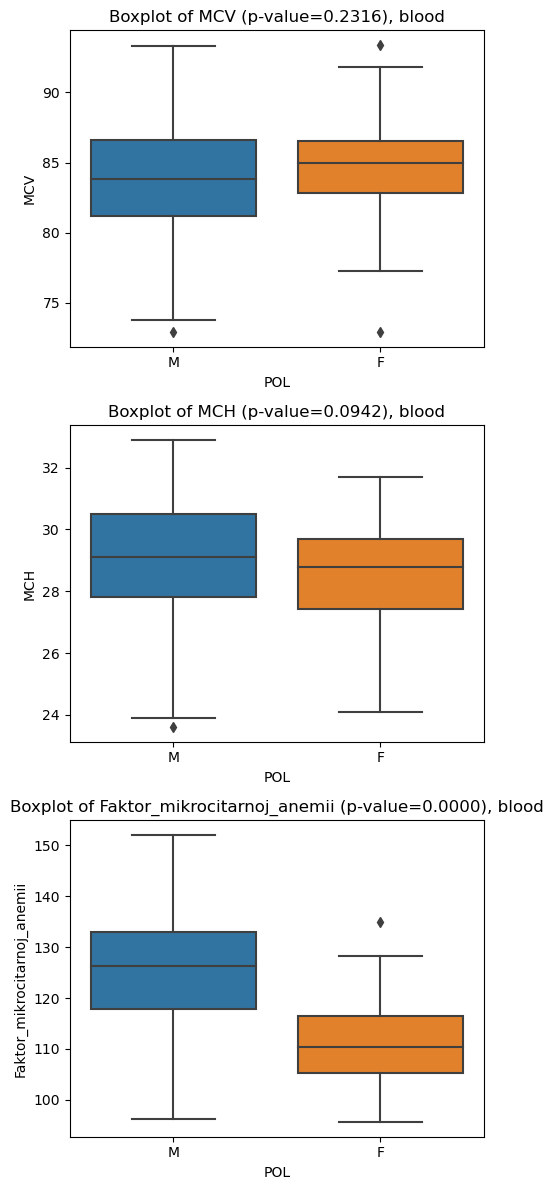

In [49]:
##Independent T-test for the normally distributed variables between male and female, blood. (both normal)

variables = ["MCV", "MCH", "Faktor_mikrocitarnoj_anemii"]

df = df_all[(df_all['Vid_donacii'] == 'krov') &
             (df_all['Diagnosis'] == 'Iron deficiency anemia (IDA)')]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(5, 12))

for i, var in enumerate(variables):
    
    male_data = male_data_sick_blood[var]
    female_data = female_data_sick_blood[var]
    
    
    # Perform t-test
    stat, p_value = ttest_ind(male_data, female_data)
    
    print(f"Independent Samples t-test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print("Reject null hypothesis: There is a significant difference between groups.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference between groups.")
    print()
    
    
    # Plot boxplot
    sns.boxplot(x='POL', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} (p-value={p_value:.4f}), blood')

# Adjust layout
plt.tight_layout()
plt.show()

Mann-Whitney U Test for Variable RET_HE:
  U Statistic: 5579.0000
  p-value: 0.0028
  Conclusion: Reject null hypothesis, there is a significant difference between males and females.

Mann-Whitney U Test for Variable Mikrocity:
  U Statistic: 3821.5000
  p-value: 0.1470
  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.

Mann-Whitney U Test for Variable RDW_SD:
  U Statistic: 3678.0000
  p-value: 0.0699
  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.

Mann-Whitney U Test for Variable RDW_CV:
  U Statistic: 3132.0000
  p-value: 0.0014
  Conclusion: Reject null hypothesis, there is a significant difference between males and females.

Mann-Whitney U Test for Variable Hb_nizkoj_plotnosti:
  U Statistic: 2396.5000
  p-value: 0.0000
  Conclusion: Reject null hypothesis, there is a significant difference between males and females.

Mann-Whitney U Test for Variable RBC:
  U Stat

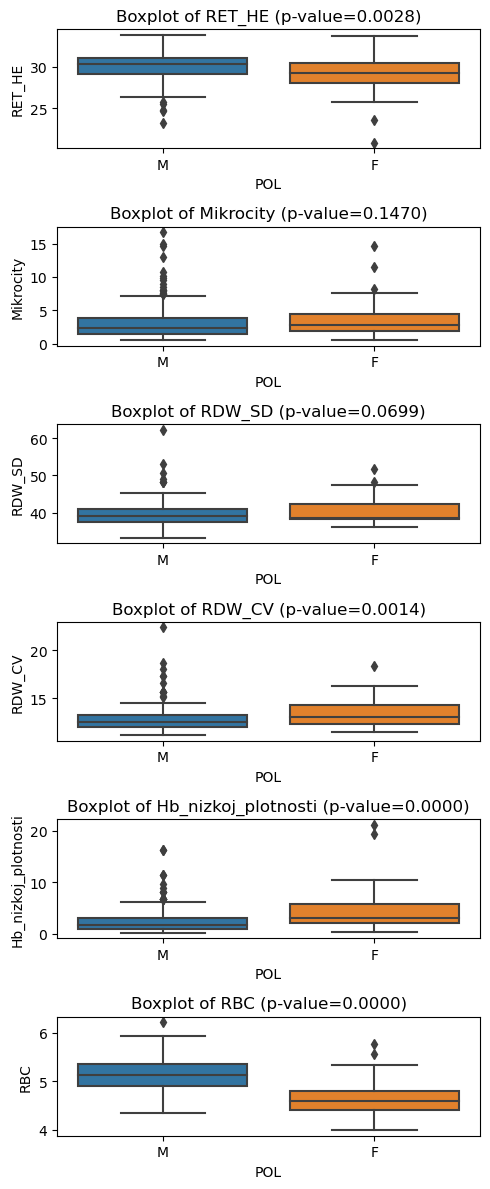

In [57]:
##Mann-Whitney U for non-paramtertic variables between male and female, blood. (even if one of them was normal)

df = df_all[(df_all['Vid_donacii'] == 'krov') &
             (df_all['Diagnosis'] == 'Iron deficiency anemia (IDA)')]

variables = ["RET_HE", "Mikrocity", "RDW_SD", "RDW_CV", "Hb_nizkoj_plotnosti", "RBC"]


# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(5, 12))

# Perform Mann-Whitney U test and plot boxplots for each variable
for i, var in enumerate(variables):
    # Perform Mann-Whitney U test
    male_data = male_data_sick_blood[var]
    female_data = female_data_sick_blood[var]
    stat, p_value = mannwhitneyu(male_data, female_data)
    
    
    # Print results for variable E
    print(f"Mann-Whitney U Test for Variable {var}:")
    print(f"  U Statistic: {stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Conclusion: Reject null hypothesis, there is a significant difference between males and females.")
    else:
        print("  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.")
    print()
    
    
    # Plot boxplot
    sns.boxplot(x='POL', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} (p-value={p_value:.4f})')

# Adjust layout
plt.tight_layout()
plt.show()


# Comparison of similarity (healthy)

In [58]:
male_data_normal_blood = df_all[(df_all['POL'] == 'M') & (df_all['Vid_donacii'] == 'krov') & (df_all['Diagnosis'] == 'Normal')]
female_data_normal_blood = df_all[(df_all['POL'] == 'F') & (df_all['Vid_donacii'] == 'krov') & (df_all['Diagnosis'] == 'Normal')]

variables = ['RET_HE', 'Mikrocity' ,'RBC' , 'RDW_SD' , 'MCV' , 'MCH' ,'RDW_CV' , 'Faktor_mikrocitarnoj_anemii' , 'Hb_nizkoj_plotnosti']

In [59]:
#Men

for var in variables:
    data = male_data_normal_blood[var]
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print('Fail to reject the Null Hypothesis, data is normally distributed')
    else:
        print('Reject the null hypothesis (suggesting non-normality)')
    print()

Shapiro-Wilk Test for Variable RET_HE:
Statistic: 0.9713155031204224, p-value: 0.05014778673648834
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable Mikrocity:
Statistic: 0.8452188372612, p-value: 4.2967005953187254e-08
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable RBC:
Statistic: 0.9862112402915955, p-value: 0.48767584562301636
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_SD:
Statistic: 0.9743020534515381, p-value: 0.0805491954088211
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable MCV:
Statistic: 0.9900636076927185, p-value: 0.7550249099731445
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable MCH:
Statistic: 0.9847979545593262, p-value: 0.40295684337615967
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variabl

In [60]:
#Women

for var in variables:
    data = female_data_normal_blood[var]
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print('Fail to reject the Null Hypothesis, data is normally distributed')
    else:
        print('Reject the null hypothesis (suggesting non-normality)')
    print()

Shapiro-Wilk Test for Variable RET_HE:
Statistic: 0.9653720259666443, p-value: 0.7075480818748474
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable Mikrocity:
Statistic: 0.6920168399810791, p-value: 6.458435382228345e-05
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable RBC:
Statistic: 0.9739084243774414, p-value: 0.8671001195907593
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_SD:
Statistic: 0.6717847585678101, p-value: 3.820503116003238e-05
Reject the null hypothesis (suggesting non-normality)

Shapiro-Wilk Test for Variable MCV:
Statistic: 0.9304893016815186, p-value: 0.19807389378547668
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable MCH:
Statistic: 0.96541827917099, p-value: 0.7084667682647705
Fail to reject the Null Hypothesis, data is normally distributed

Shapiro-Wilk Test for Variable RDW_CV:


Independent Samples t-test for Variable RET_HE:
Statistic: 0.5332718065486257, p-value: 0.5949942667780149
Fail to reject null hypothesis: There is no significant difference between groups.

Independent Samples t-test for Variable RBC:
Statistic: 4.111846296335893, p-value: 7.908250142664328e-05
Reject null hypothesis: There is a significant difference between groups.

Independent Samples t-test for Variable MCV:
Statistic: -0.515654476791702, p-value: 0.6072008359707053
Fail to reject null hypothesis: There is no significant difference between groups.

Independent Samples t-test for Variable MCH:
Statistic: 0.7591451381010541, p-value: 0.44949958251734656
Fail to reject null hypothesis: There is no significant difference between groups.



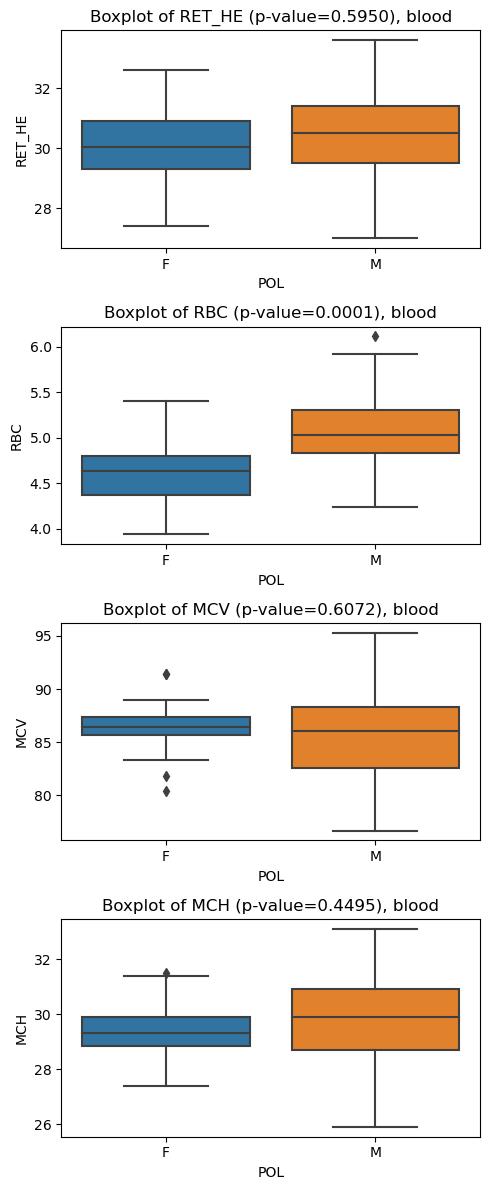

In [61]:
##Independent T-test for the normally distributed variables between male and female, blood. (both normal)

variables = ["RET_HE", "RBC", "MCV", "MCH"]

df = df_all[(df_all['Vid_donacii'] == 'krov') &
             (df_all['Diagnosis'] == 'Normal')]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(5, 12))

for i, var in enumerate(variables):
    
    male_data = male_data_normal_blood[var]
    female_data = female_data_normal_blood[var]
    
    
    # Perform t-test
    stat, p_value = ttest_ind(male_data, female_data)
    
    print(f"Independent Samples t-test for Variable {var}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print("Reject null hypothesis: There is a significant difference between groups.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference between groups.")
    print()
    
    
    # Plot boxplot
    sns.boxplot(x='POL', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} (p-value={p_value:.4f}), blood')

# Adjust layout
plt.tight_layout()
plt.show()

Mann-Whitney U Test for Variable Mikrocity:
  U Statistic: 779.5000
  p-value: 0.9796
  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.

Mann-Whitney U Test for Variable RDW_SD:
  U Statistic: 955.5000
  p-value: 0.1433
  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.

Mann-Whitney U Test for Variable RDW_CV:
  U Statistic: 751.5000
  p-value: 0.7918
  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.

Mann-Whitney U Test for Variable Faktor_mikrocitarnoj_anemii:
  U Statistic: 1248.5000
  p-value: 0.0001
  Conclusion: Reject null hypothesis, there is a significant difference between males and females.

Mann-Whitney U Test for Variable Hb_nizkoj_plotnosti:
  U Statistic: 506.5000
  p-value: 0.0188
  Conclusion: Reject null hypothesis, there is a significant difference between males and females.



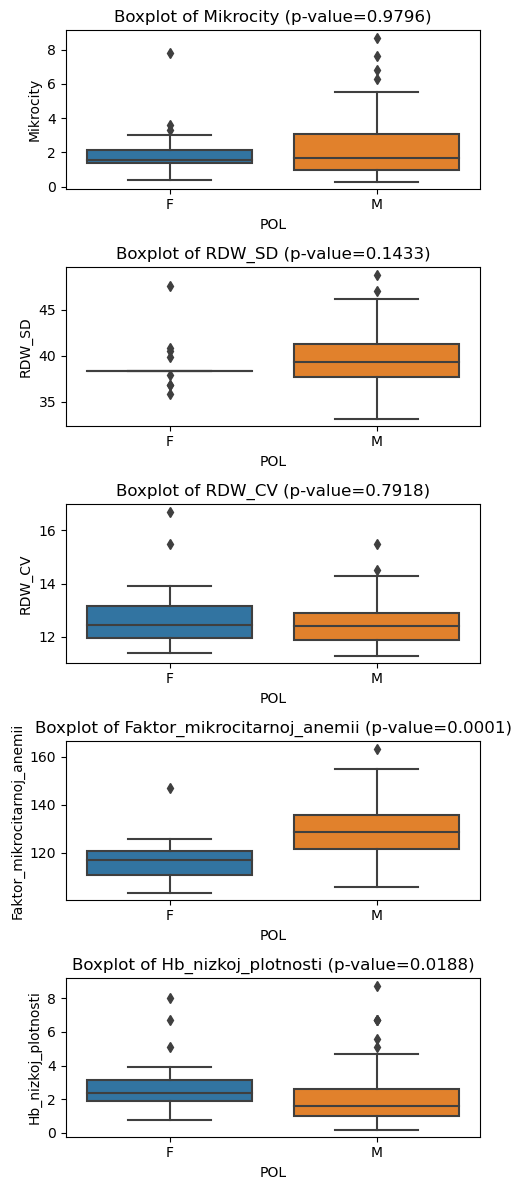

In [62]:
##Mann-Whitney U for non-paramtertic variables between male and female, blood. (even if one of them was normal)

df = df_all[(df_all['Vid_donacii'] == 'krov') &
             (df_all['Diagnosis'] == 'Normal')]

variables = ["Mikrocity", "RDW_SD", "RDW_CV", "Faktor_mikrocitarnoj_anemii", "Hb_nizkoj_plotnosti"]


# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(5, 12))

# Perform Mann-Whitney U test and plot boxplots for each variable
for i, var in enumerate(variables):
    # Perform Mann-Whitney U test
    male_data = male_data_normal_blood[var]
    female_data = female_data_normal_blood[var]
    stat, p_value = mannwhitneyu(male_data, female_data)
    
    
    # Print results for variable E
    print(f"Mann-Whitney U Test for Variable {var}:")
    print(f"  U Statistic: {stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Conclusion: Reject null hypothesis, there is a significant difference between males and females.")
    else:
        print("  Conclusion: Fail to reject null hypothesis, there is no significant difference between males and females.")
    print()
    
    
    # Plot boxplot
    sns.boxplot(x='POL', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} (p-value={p_value:.4f})')

# Adjust layout
plt.tight_layout()
plt.show()
